In [2]:
import pandas as pd

file_path = '/mnt/data/kc_house_data.csv'
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Display basic information about the dataset
data.info()

data.isnull().sum()
data.describe()
selected_features = ['bedrooms', 'sqft_lot', 'condition', 'yr_built']
target_variable = 'price'

X = data[selected_features]
y = data[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for training
params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse',  
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = bst.predict(dtest)

# Evaluate the model's performance
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE: {rmse:.2f}")

RMSE: 349307.02


In [6]:
import pandas as pd

file_path = 'kc_house_data.csv'
data = pd.read_csv(file_path)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Select relevant features and the target variable
selected_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
    'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
    'lat', 'long', 'sqft_living15', 'sqft_lot15'
]
target_variable = 'price'

X = data[selected_features]
y = data[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create a DMatrix for training and testing
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror', 
    'eval_metric': 'rmse',  
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

preds = bst.predict(dtest)

# Evaluate the model's performance
rmse = mean_squared_error(y_test, preds, squared=False)
rmse


147991.93447145278

Training RMSE: 55451.33
Test RMSE: 147991.93


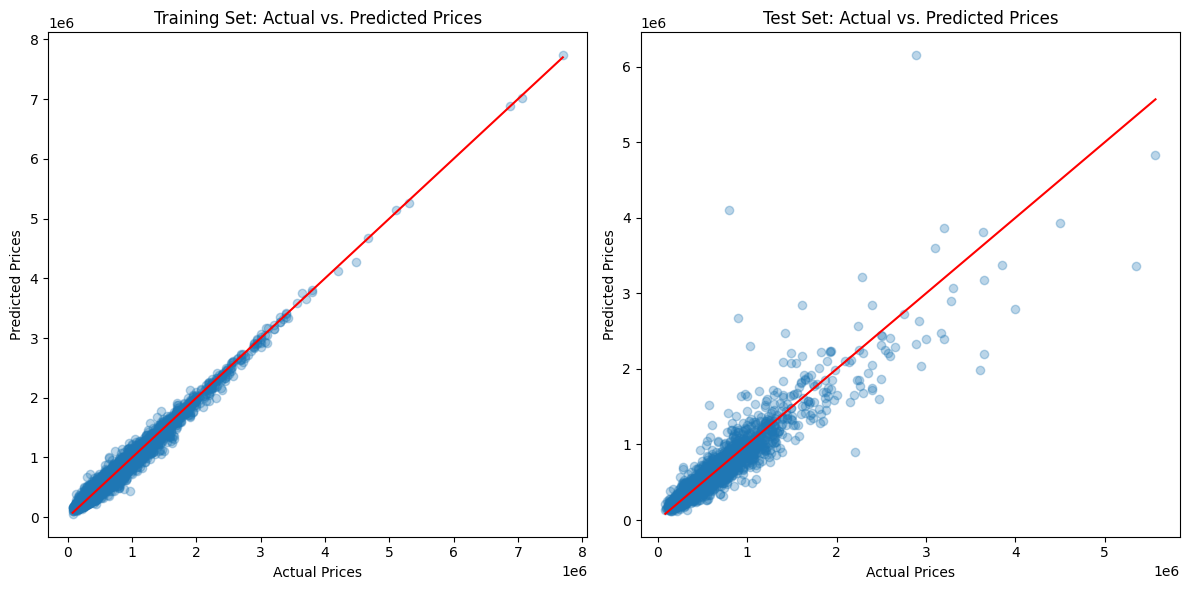

In [22]:
# Plot actual vs. predicted prices for training set
train_preds = bst.predict(dtrain)
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, preds, squared=False)

import matplotlib.pyplot as plt

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Plot actual vs. predicted prices for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_preds, alpha=0.3)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training Set: Actual vs. Predicted Prices')

# Plot actual vs. predicted prices for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, preds, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Test Set: Actual vs. Predicted Prices')

plt.tight_layout()
plt.show()

In [10]:
#Prediction
single_input = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2.0],
    'sqft_living': [1800],
    'sqft_lot': [5000],
    'floors': [1.0],
    'waterfront': [0],
    'view': [0],
    'condition': [3],
    'grade': [7],
    'sqft_above': [1800],
    'sqft_basement': [0],
    'yr_built': [1985],
    'yr_renovated': [0],
    'zipcode': [98001],
    'lat': [47.5112],
    'long': [-122.257],
    'sqft_living15': [1500],
    'sqft_lot15': [5000]
})

dsingle = xgb.DMatrix(single_input)

prediction = bst.predict(dsingle)

print(f"Predicted home price: ${prediction[0]:,.2f}")

Predicted home price: $352,550.75
